### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\jupyter_analysis_projects\Salary_Data\Salary_Data.csv')
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


## Exploring And Cleaning The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
## Null values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
## Filling Numerical Null Values With Mean For each column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [7]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
## Filling string values with most count value for each columns
print(df['Gender'].value_counts())
print('#############################')
print(df['Education Level'].value_counts())
print('#############################')
print(df['Job Title'].value_counts())

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64
#############################
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64
#############################
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Supply Chain Analyst            1
Name: Job Title, Length: 193, dtype: int64


In [9]:
df['Gender'] = df['Gender'].fillna('Male')
df['Education Level'] = df['Education Level'].fillna("Bachelor's Degree")
df['Job Title'] = df['Job Title'].fillna('Software Engineer')

In [10]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

<AxesSubplot:>

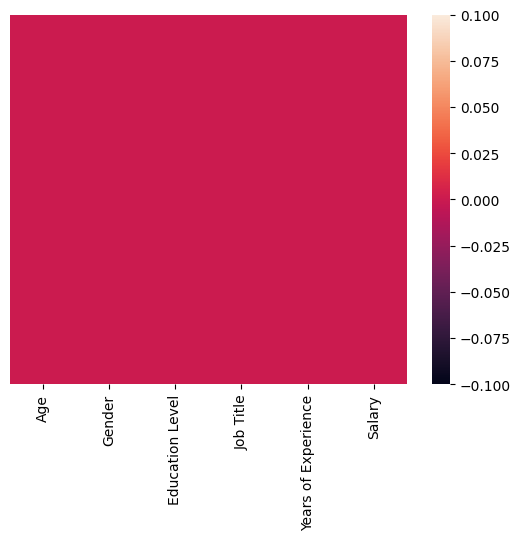

In [11]:
sns.heatmap(df.isnull(),yticklabels=False)

## duplicate

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

## correlations

<AxesSubplot:>

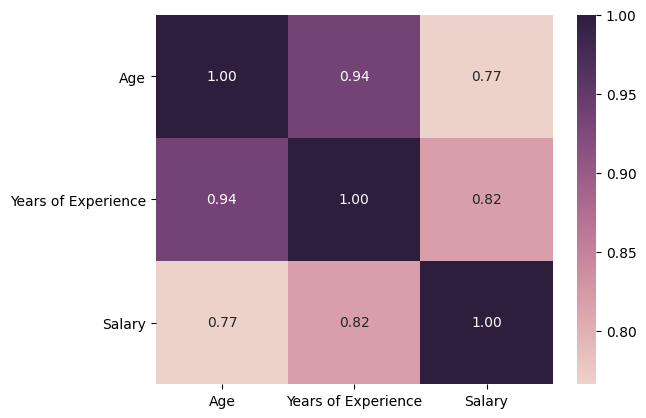

In [14]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=sns.cubehelix_palette(as_cmap=True))

## Male VS Female

<AxesSubplot:ylabel='Gender'>

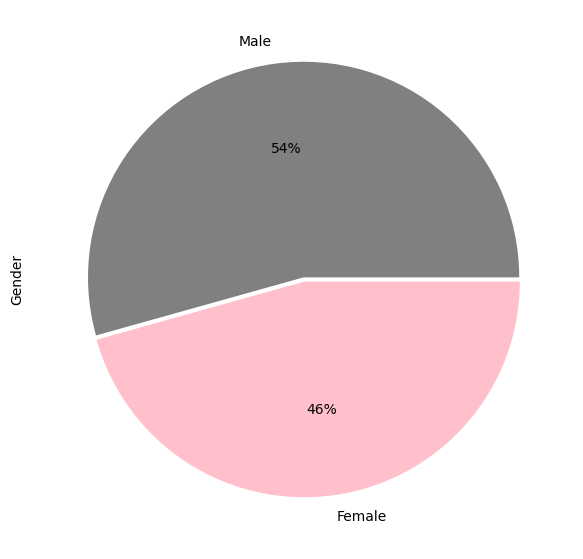

In [15]:
plt.figure(figsize=(7,7))
Gender = df[df['Gender']!='Other']
G = Gender['Gender'].value_counts()
colors = ['grey', 'pink']
explode = (0.01, 0.01)
G.plot(kind= 'pie',autopct='%1.0f%%',colors=colors,explode=explode)

In [16]:
## from the piecahrt we see male rate more than female 

## Education Level

<AxesSubplot:ylabel='Education Level'>

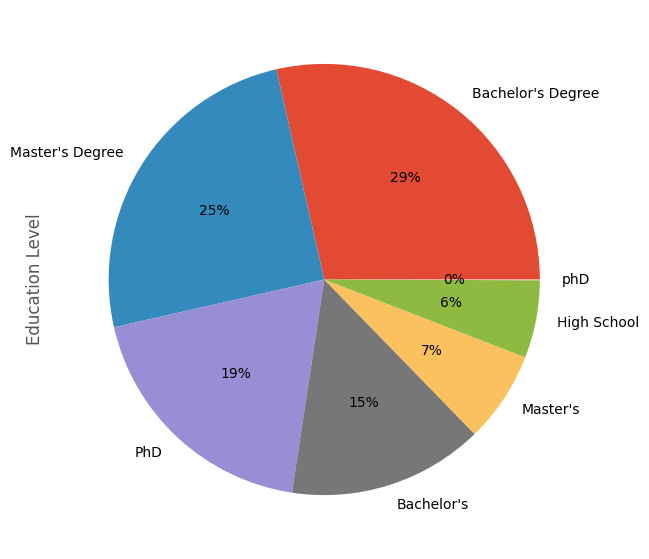

In [17]:
plt.figure(figsize=(7,7))
plt.style.use('ggplot')
E = Gender['Education Level'].value_counts()
#colors = ['grey', 'pink']
#explode = (0.05, 0.05)
E.plot(kind= 'pie',autopct='%1.0f%%')

## What is the average salary for PHD, depending on the years of experience?

Text(0.5, 1.0, 'Salary average of PHD')

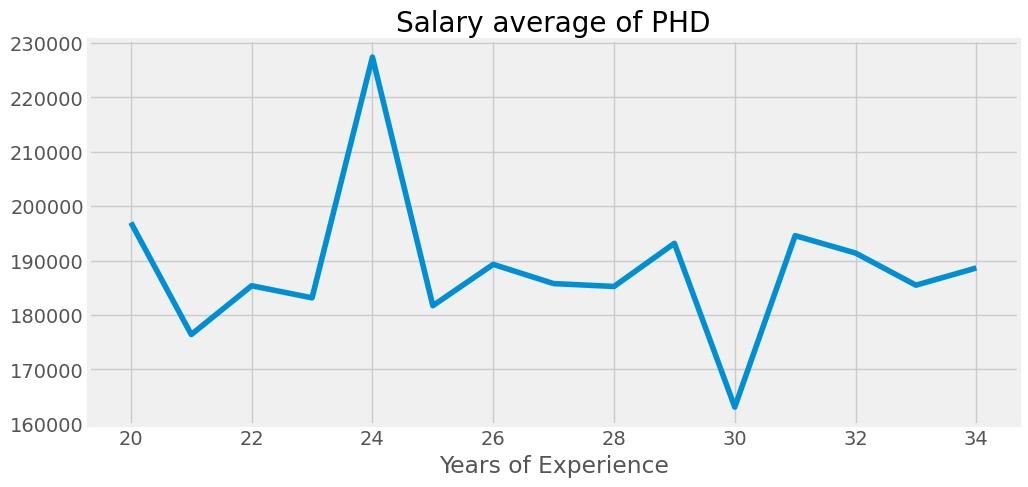

In [18]:
df_Phd = df[(df['Education Level']=='PhD') & (df['Years of Experience']>=20)]
df_Phd
plt.figure(figsize=(12,5))
plt.style.use('fivethirtyeight')
df_Salary_Experience = df_Phd.groupby(['Years of Experience'])['Salary'].mean()
df_Salary_Experience.plot(kind='line')
plt.title('Salary average of PHD')

In [19]:
## PhD holders on 24 years of experience have the top average salaries

In [20]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Males Engineers Salaries

In [21]:
## filtering the data based on male gender and Engineer Job title
df_Engineers = df[(df['Job Title'].str.contains('Engineer')) & (df['Gender']=='Male')]
df_Engineers

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
17,39.0,Male,PhD,Senior Engineer,12.0,115000.0
37,42.0,Male,Master's,Project Engineer,14.0,115000.0
42,30.0,Male,Bachelor's,Network Engineer,3.0,60000.0
57,43.0,Male,PhD,Senior Engineer,17.0,140000.0
...,...,...,...,...,...,...
5751,29.0,Male,Bachelor's Degree,Software Engineer,3.0,75000.0
5880,33.0,Male,Master's Degree,Software Engineer,8.0,120000.0
6007,34.0,Male,Master's Degree,Software Engineer,9.0,125000.0
6016,28.0,Male,Bachelor's Degree,Software Engineer,3.0,70000.0


Text(0.5, 1.0, 'Average Male Engineering Salaries')

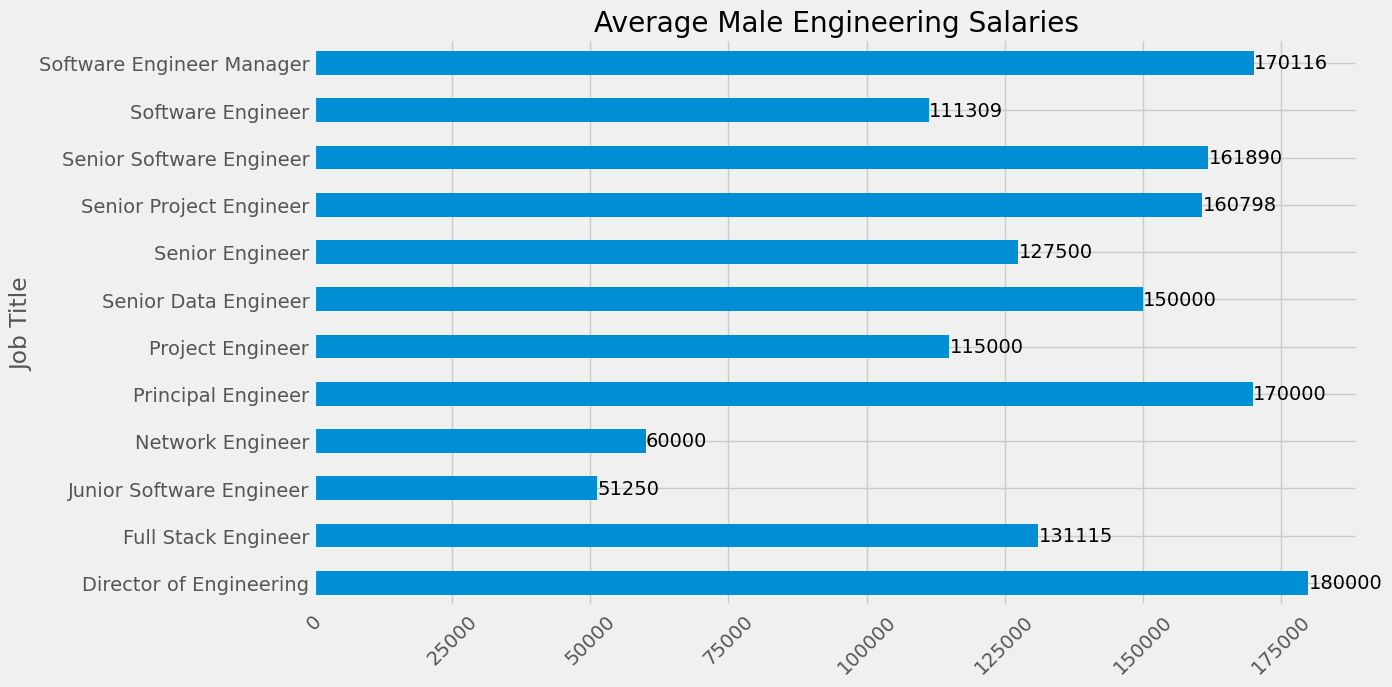

In [22]:
df_Male_Engineers = df_Engineers.groupby('Job Title')['Salary'].mean()
plt.figure(figsize=(12,7))
plt.style.use('fivethirtyeight')
ax = df_Male_Engineers.plot(kind='barh')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], label_type='edge')
ax.margins(y=0.1)
plt.title('Average Male Engineering Salaries')

In [23]:
## based on chart Director of Engineering and software Engineer manager have the max 
## Average salaries with 180000 and 170776 in order
## Junior sofrware Engineer have the min average salaries with 51250

## Data Analyst And Data Scientist Average Salaries

In [24]:
df_Data = df[(df['Job Title']=='Data Analyst')|(df['Job Title']=='Data Scientist')]
df_Data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
32,29.0,Male,Master's,Data Scientist,3.0,75000.0
81,41.0,Female,Master's,Data Analyst,13.0,80000.0
375,31.0,Male,Master's,Data Scientist,6.0,160000.0
378,27.0,Female,Bachelor's,Data Analyst,2.0,110000.0


In [25]:
D = df_Data.groupby(['Job Title','Education Level'])['Salary'].mean()
D

Job Title       Education Level  
Data Analyst    Bachelor's           118685.714286
                Bachelor's Degree    149800.000000
                Master's              98750.000000
                Master's Degree      103571.428571
Data Scientist  Bachelor's           182500.000000
                Bachelor's Degree    150000.000000
                Master's             166333.333333
                Master's Degree      158000.000000
                PhD                  162076.923077
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Data Analyst And Data Scientist Avarege Salary')

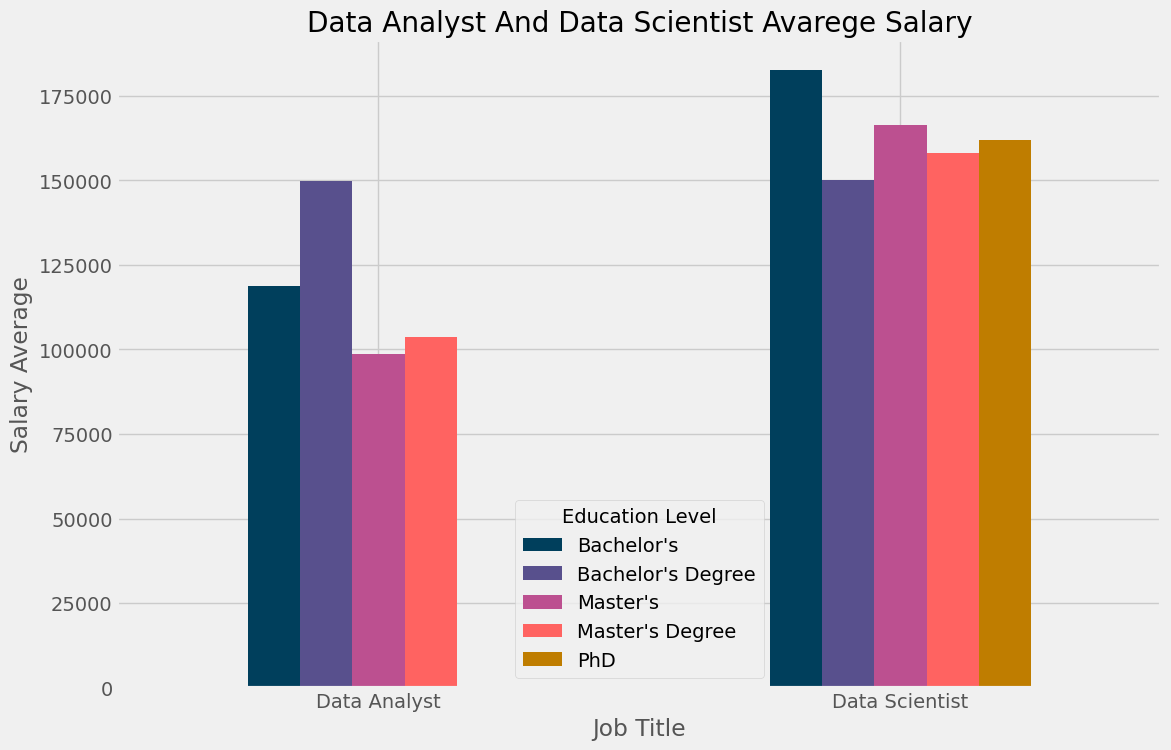

In [26]:
# plt.figure(figsize=(15,15))
plt.style.use('fivethirtyeight')
D.unstack().plot(kind='bar', legend=True,
                 color=['#003f5c', '#58508d', '#bc5090','#ff6361','#bf7d00'],
                 figsize=(12,8))
plt.ylabel("Salary Average")
plt.xticks(rotation=0)
plt.title('Data Analyst And Data Scientist Avarege Salary')

## Top Femail Jobs

In [27]:
df_Female = df[df['Gender']=='Female']
female_groupby = df_Female.groupby('Job Title')['Salary'].mean().head(10)
female_groupby

Job Title
Accountant                          55000.000000
Administrative Assistant            50000.000000
Back end Developer                  91893.000000
Business Analyst                    80000.000000
Content Marketing Manager          117692.307692
Copywriter                          40000.000000
Creative Director                  120000.000000
Customer Service Manager           130000.000000
Customer Service Representative     36666.666667
Customer Success Rep                40000.000000
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Female Top Jobs Salaries')

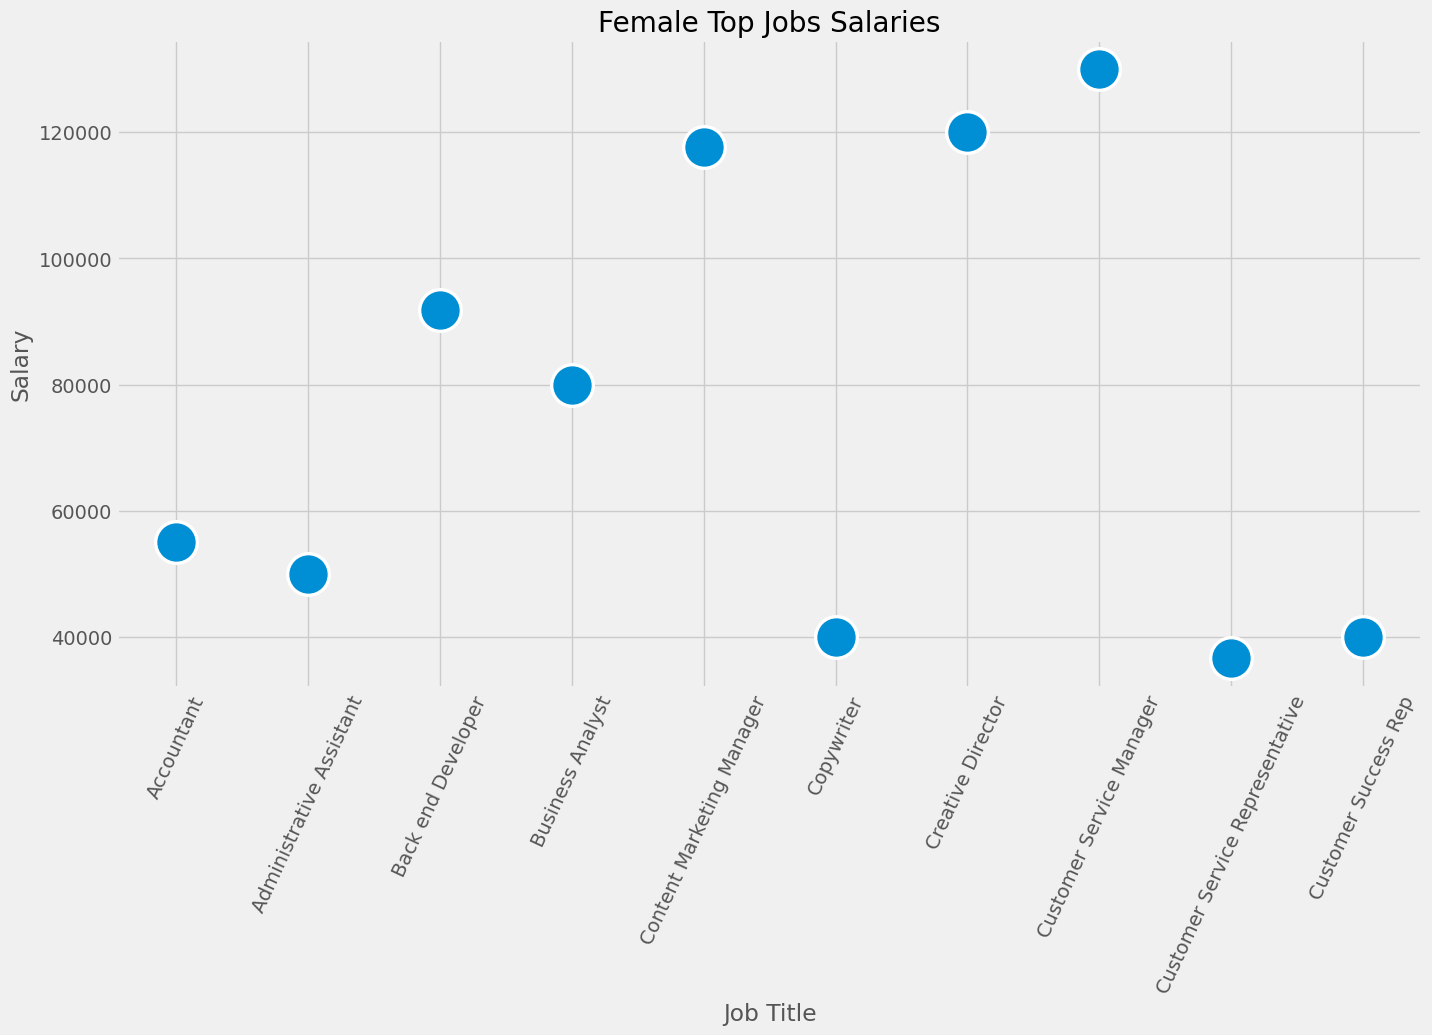

In [29]:
# female_groupby.plot(kind='scatterplot')
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=female_groupby)
plt.xticks(rotation=65)
plt.rcParams['lines.markersize'] = 30           # <---- set markersize here
plt.title('Female Top Jobs Salaries')